Enter the stock ticker [Based on Yahoo Finance]:  TATAMOTORS.NS


C:\Users\sanan\AppData\Local\Temp\ipykernel_5892\3200324948.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Last Close Price": hist['Close'][-1] if not hist.empty else "N/A",



General Information:
  Ticker: TATAMOTORS.NS
  Name: Tata Motors Limited
  Market Cap: 2851579625472
  Sector: Consumer Cyclical
  Industry: Auto Manufacturers

Valuation Metrics:
  Trailing P/E: 8.606266
  Forward P/E: 10.767992
  PEG Ratio: N/A
  Price-to-Book (P/B): 2.6362538
  Enterprise Value: 3301254103040
  EV/EBITDA: 6.794

Profitability Metrics:
  Gross Margins: 0.45356
  Operating Margins: 0.07129
  Net Margins: 0.07576
  Return on Assets (ROA): 0.061079998
  Return on Equity (ROE): 0.39181

Growth Metrics:
  Revenue Growth (YoY): -0.035
  Earnings Growth (YoY): N/A
  Free Cash Flow (FCF): 118380339200
  EBITDA Growth: 0.110410005

Dividend Metrics:
  Dividend Yield: 0.0039
  Dividend Payout Ratio: 0.033299997
  Forward Dividend: 3.0
  Ex-Dividend Date: 1718064000

Financial Health Metrics:
  Current Ratio: 0.939
  Quick Ratio: 0.491
  Debt-to-Equity (D/E): 95.362
  Interest Coverage Ratio: N/A

Performance Metrics:
  Beta: 1.618
  52-Week High: 1179.0
  52-Week Low: 717.7
 

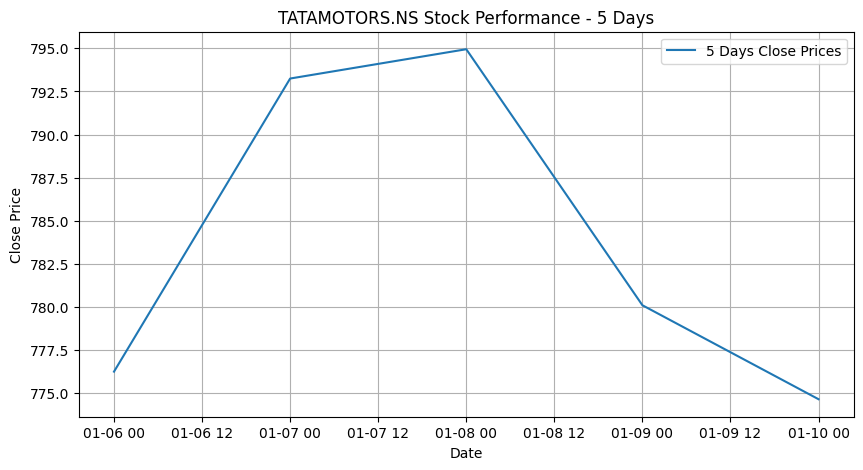

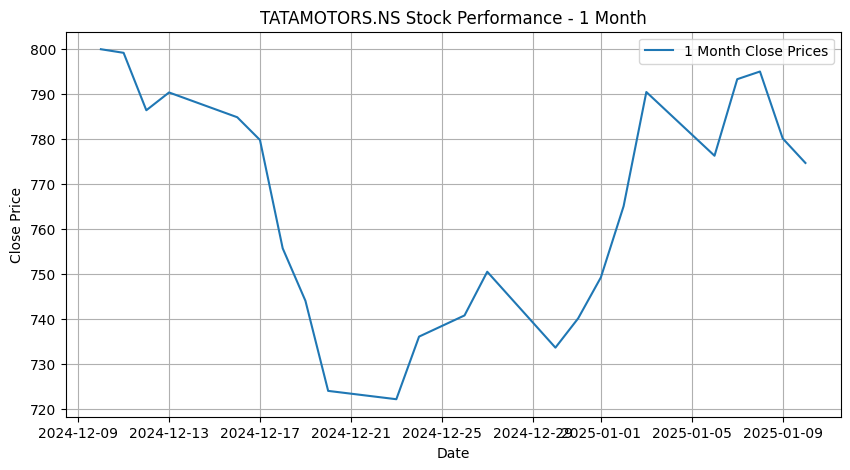

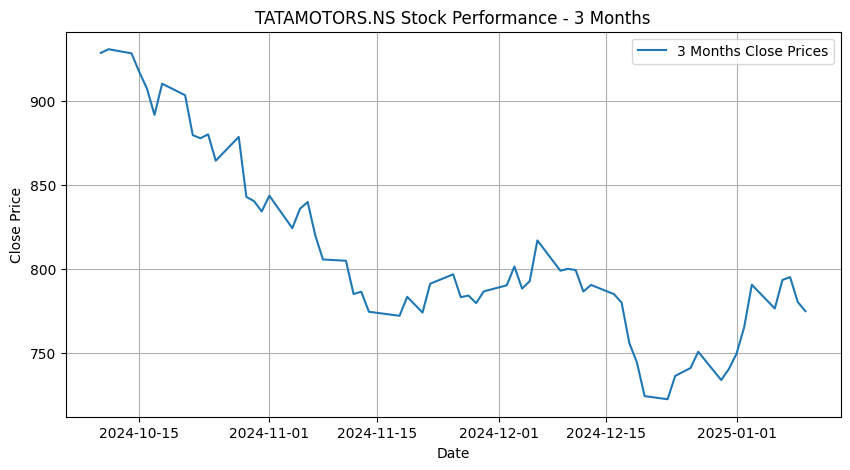

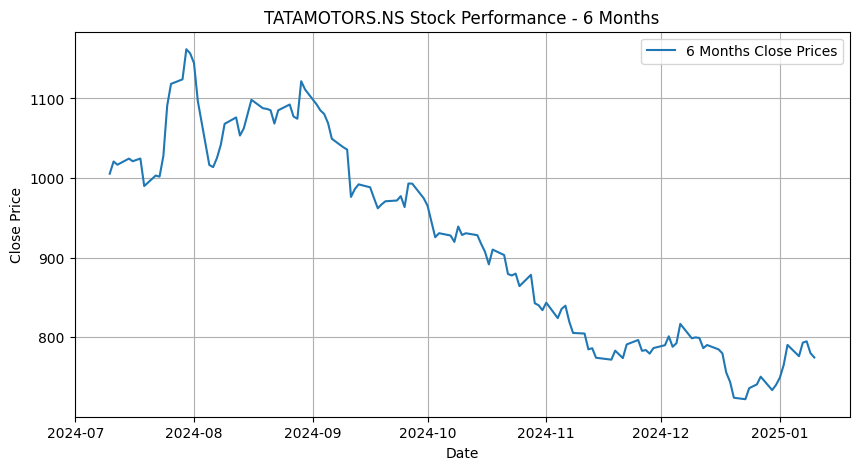

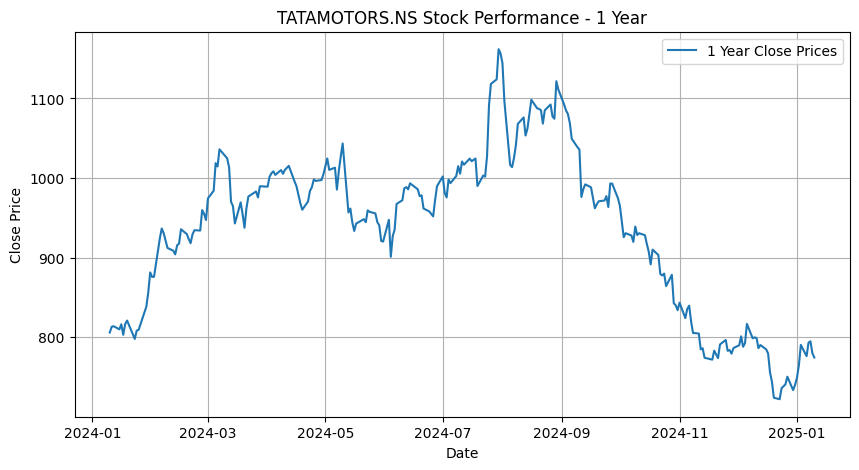

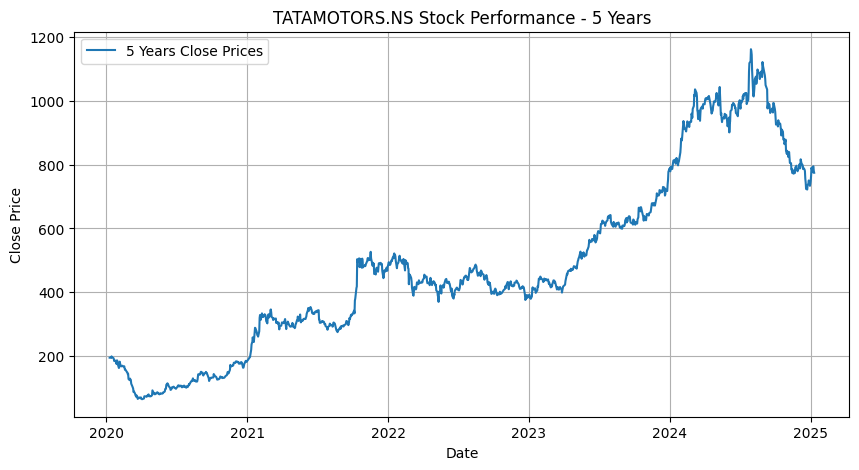

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker):
    try:
        # Fetch stock info
        stock = yf.Ticker(ticker)
        info = stock.info

        # General Stock Information
        general_info = {
            "Ticker": ticker,
            "Name": info.get("longName", "N/A"),
            "Market Cap": info.get("marketCap", "N/A"),
            "Sector": info.get("sector", "N/A"),
            "Industry": info.get("industry", "N/A"),
        }

        # Valuation Metrics
        valuation_metrics = {
            "Trailing P/E": info.get("trailingPE", "N/A"),
            "Forward P/E": info.get("forwardPE", "N/A"),
            "PEG Ratio": info.get("pegRatio", "N/A"),
            "Price-to-Book (P/B)": info.get("priceToBook", "N/A"),
            "Enterprise Value": info.get("enterpriseValue", "N/A"),
            "EV/EBITDA": info.get("enterpriseToEbitda", "N/A"),
        }

        # Profitability Metrics
        profitability_metrics = {
            "Gross Margins": info.get("grossMargins", "N/A"),
            "Operating Margins": info.get("operatingMargins", "N/A"),
            "Net Margins": info.get("profitMargins", "N/A"),
            "Return on Assets (ROA)": info.get("returnOnAssets", "N/A"),
            "Return on Equity (ROE)": info.get("returnOnEquity", "N/A"),
        }

        # Growth Metrics
        growth_metrics = {
            "Revenue Growth (YoY)": info.get("revenueGrowth", "N/A"),
            "Earnings Growth (YoY)": info.get("earningsGrowth", "N/A"),
            "Free Cash Flow (FCF)": info.get("freeCashflow", "N/A"),
            "EBITDA Growth": info.get("ebitdaMargins", "N/A"),
        }

        # Dividend Metrics
        dividend_metrics = {
            "Dividend Yield": info.get("dividendYield", "N/A"),
            "Dividend Payout Ratio": info.get("payoutRatio", "N/A"),
            "Forward Dividend": info.get("dividendRate", "N/A"),
            "Ex-Dividend Date": info.get("exDividendDate", "N/A"),
        }

        # Financial Health Metrics
        financial_health_metrics = {
            "Current Ratio": info.get("currentRatio", "N/A"),
            "Quick Ratio": info.get("quickRatio", "N/A"),
            "Debt-to-Equity (D/E)": info.get("debtToEquity", "N/A"),
            "Interest Coverage Ratio": info.get("interestCoverage", "N/A"),
        }

        # Performance Metrics
        performance_metrics = {
            "Beta": info.get("beta", "N/A"),
            "52-Week High": info.get("fiftyTwoWeekHigh", "N/A"),
            "52-Week Low": info.get("fiftyTwoWeekLow", "N/A"),
            "Average Volume": info.get("averageVolume", "N/A"),
        }

        # Analyst Recommendations
        analyst_recommendations = {
            "Target Price": info.get("targetMeanPrice", "N/A"),
            "Number of Analysts": info.get("numberOfAnalystOpinions", "N/A"),
            "Recommendation Mean": info.get("recommendationMean", "N/A"),
        }

        # Shareholder Data
        shareholder_data = {
            "Shares Outstanding": info.get("sharesOutstanding", "N/A"),
            "Float": info.get("floatShares", "N/A"),
            "Insider Ownership": info.get("heldPercentInsiders", "N/A"),
            "Institutional Ownership": info.get("heldPercentInstitutions", "N/A"),
        }

        # Historical Data
        hist = stock.history(period="5y")
        historical_data = {
            "Last Close Price": hist['Close'][-1] if not hist.empty else "N/A",
            "5-Year Historical Data": hist.tail() if not hist.empty else "No Data",
        }

        # Technical Metrics
        technical_metrics = {
            "50-Day Moving Avg": info.get("fiftyDayAverage", "N/A"),
            "200-Day Moving Avg": info.get("twoHundredDayAverage", "N/A"),
        }

        # Compile all data into a structured dictionary
        stock_data = {
            "General Information": general_info,
            "Valuation Metrics": valuation_metrics,
            "Profitability Metrics": profitability_metrics,
            "Growth Metrics": growth_metrics,
            "Dividend Metrics": dividend_metrics,
            "Financial Health Metrics": financial_health_metrics,
            "Performance Metrics": performance_metrics,
            "Yahoo Analyst Recommendations": analyst_recommendations,
            "Shareholder Data": shareholder_data,
            "Historical Data": historical_data,
            "Technical Metrics": technical_metrics,
        }

        return stock_data, hist

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None, None


def plot_graphs(hist, ticker):
    periods = {
        "5 Days": "5d",
        "1 Month": "1mo",
        "3 Months": "3mo",
        "6 Months": "6mo",
        "1 Year": "1y",
        "5 Years": "5y",
    }

    for period, period_code in periods.items():
        try:
            data = yf.Ticker(ticker).history(period=period_code)
            plt.figure(figsize=(10, 5))
            plt.plot(data['Close'], label=f'{period} Close Prices')
            plt.title(f"{ticker} Stock Performance - {period}")
            plt.xlabel("Date")
            plt.ylabel("Close Price")
            plt.legend()
            plt.grid()
            plt.show()
        except Exception as e:
            print(f"Could not plot {period} data: {e}")


# Run the script
ticker = input("Enter the stock ticker [Based on Yahoo Finance]: ").upper()
stock_data, hist = get_stock_data(ticker)

if stock_data:
    for category, data in stock_data.items():
        print(f"\n{category}:")
        for key, value in data.items():
            print(f"  {key}: {value}")
    
    if hist is not None:
        plot_graphs(hist, ticker)
